## Observations and Insights

## Dependencies and starter code

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data_merge = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

study_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_means = study_data_merge.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_medians = study_data_merge.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vars = study_data_merge.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stds = study_data_merge.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sems = study_data_merge.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
Table = pd.DataFrame({"Mean Tumor Voulume":tumor_means,
                      "Median Tumor Voulume":tumor_medians,
                      "Tumor Volume Variance":tumor_vars,
                      "Tumor Volume Stander Deviation":tumor_stds,
                      "Tumor Volume Stander Error": tumor_sems})
Table                    

,Mean Tumor Voulume,Median Tumor Voulume,Tumor Volume Variance,Tumor Volume Stander Deviation,Tumor Volume Stander Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

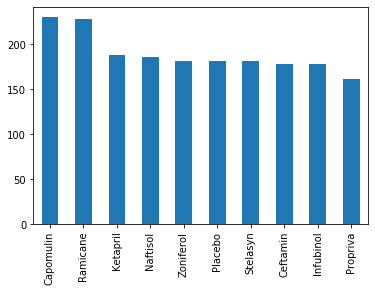

In [48]:
# Generate a bar plot showing number of data points for each treatmentregimen using pandas
amount_of_drugs = study_data_merge["Drug Regimen"].value_counts()
amount_of_drugs.plot.bar(x= ("Drug Regimen"),y=("Number of each Drug Used"))

Text(0, 0.5, 'Number of each Drug Used')

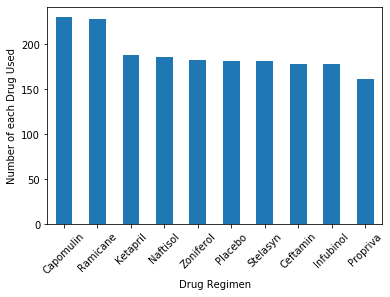

In [49]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
amount_of_drugs.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of each Drug Used")

## Pie plots

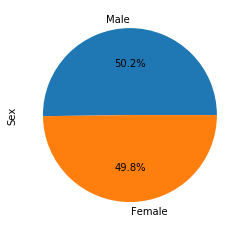

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = mouse_metadata.Sex.value_counts()
sex_counts.plot.pie(y = "Sex", autopct= "%1.1f%%")
plt.show()

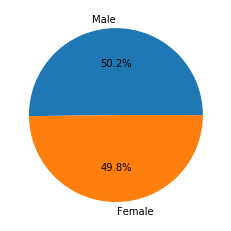

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = mouse_metadata.Sex.value_counts()
plt.pie(sex_counts, labels = sex_counts.index, autopct='%1.1f%%')
plt.show()

## Quartiles, outliers and boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
max_tumor = study_data_merge.groupby(["Mouse ID"]).max
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(clean_study_data_complete,on=['Mouse ID','Timepoint'],how="left")
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

TypeError: 'method' object is not subscriptable

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

NameError: name 'capomulin' is not defined

## Line and scatter plots

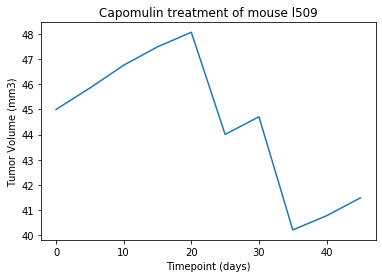

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = study_data_merge.loc[study_data_merge['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

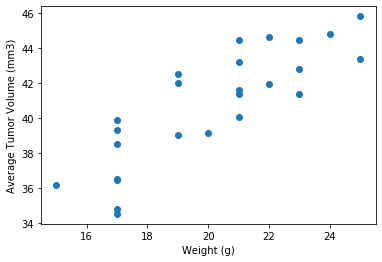

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = study_data_merge.loc[study_data_merge['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()